In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import Point
from fastai import *
from sklearn import metrics
from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd

In [2]:
sns.set(rc={'figure.figsize':(13,8)})

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
mobility =  pd.read_csv('/content/drive/MyDrive/foundation_of_DS/project/Data/nyc1.csv')
mobility.head().T

,0,1,2,3,4
id,0,1,2,3,4
VendorID,2,2,2,2,2
lpep_pickup_datetime,2016-01-01 00:29:24,2016-01-01 00:19:39,2016-01-01 00:19:33,2016-01-01 00:22:12,2016-01-01 00:24:01
Lpep_dropoff_datetime,2016-01-01 00:39:36,2016-01-01 00:39:18,2016-01-01 00:39:48,2016-01-01 00:38:32,2016-01-01 00:39:22
Store_and_fwd_flag,N,N,N,N,N
RateCodeID,1,1,1,1,1
Pickup_longitude,-73.928642,-73.952675,-73.971611,-73.989502,-73.964729
Pickup_latitude,40.680611,40.723175,40.676105,40.669579,40.682854
Dropoff_longitude,-73.924278,-73.92392,-74.013161,-74.000648,-73.94072
Dropoff_latitude,40.698044,40.761379,40.646072,40.689034,40.663013


In [7]:
mobility2 = (mobility[['id', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_latitude', 'Pickup_longitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count', 'Trip_distance','Total_amount']]).copy(deep=True)

mobility2.head()

,id,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount
0,0,2016-01-01 00:29:24,2016-01-01 00:39:36,40.680611,-73.928642,-73.924278,40.698044,1,1.46,11.16
1,1,2016-01-01 00:19:39,2016-01-01 00:39:18,40.723175,-73.952675,-73.923920,40.761379,1,3.56,16.80
2,2,2016-01-01 00:19:33,2016-01-01 00:39:48,40.676105,-73.971611,-74.013161,40.646072,1,3.79,22.25
3,3,2016-01-01 00:22:12,2016-01-01 00:38:32,40.669579,-73.989502,-74.000648,40.689034,1,3.01,14.80
4,4,2016-01-01 00:24:01,2016-01-01 00:39:22,40.682854,-73.964729,-73.940720,40.663013,1,2.55,13.30


In [8]:
mobility2['latitude'] = mobility['Pickup_latitude']
mobility2['longitude'] = mobility['Pickup_longitude']

taxi rides and their distances

<ipython-input-9-40c4a371bbcf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mobility2.Trip_distance)


<Axes: xlabel='Trip_distance', ylabel='Density'>

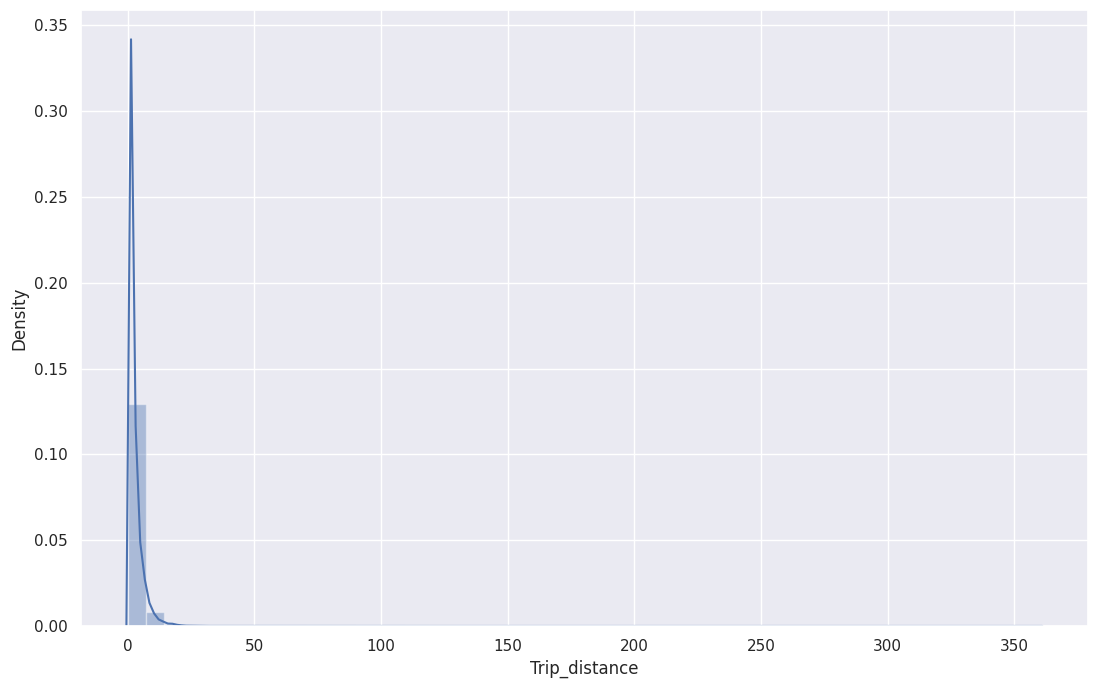

In [9]:
sns.distplot(mobility2.Trip_distance)

In [10]:
hoods = gpd.read_file("/content/drive/MyDrive/foundation_of_DS/project/Data/nyc_polygon.geojson")
hoods.head()

,neighborhood,boroughCode,borough,@id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Allerton,"POLYGON ((-73.84860 40.87167, -73.84582 40.87024, -73.85456 40.85995, -73.85467 40.85959, -73.85639 40.85759, -73.86888 40.85722, -73.86832 40.85786, -73.86955 40.85778, -73.87102 40.85731, -73.87048 40.86541, -73.87055 40.86970, -73.86722 40.86969, -73.85745 40.86953, -73.85555 40.87181, -73.85360 40.87329, -73.84860 40.87167))"
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborhood/Alley_Pond_Park,"POLYGON ((-73.74333 40.73888, -73.74371 40.73940, -73.74402 40.74077, -73.74990 40.73977, -73.75145 40.74023, -73.75349 40.74239, -73.74844 40.74334, -73.74573 40.74295, -73.74476 40.74333, -73.74648 40.74685, -73.74376 40.74756, -73.74410 40.74819, -73.74566 40.75158, -73.74602 40.75266, -73.74751 40.75614, -73.75046 40.75939, -73.75242 40.76009, -73.75348 40.75881, -73.75645 40.75889, -73.75798 40.75866, -73.75978 40.75785, -73.76067 40.75699, -73.76073 40.75590, -73.76015 40.75505, -73.76067 40.75487, -73.76142 40.75574, -73.76131 40.75696, -73.76166 40.75815, -73.76093 40.75903, -73.75..."
2,Arden Heights,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Arden_Heights,"POLYGON ((-74.16983 40.56108, -74.16982 40.56106, -74.16707 40.54821, -74.16692 40.54794, -74.16689 40.54785, -74.16685 40.54782, -74.16683 40.54778, -74.16623 40.54734, -74.16530 40.54427, -74.16992 40.54223, -74.17728 40.54063, -74.17733 40.54062, -74.17740 40.54248, -74.17650 40.54449, -74.18072 40.54667, -74.17959 40.54807, -74.17881 40.54966, -74.17933 40.54989, -74.18209 40.55110, -74.18318 40.55520, -74.18464 40.55381, -74.18551 40.55424, -74.18566 40.55410, -74.18609 40.55455, -74.18827 40.55328, -74.18781 40.55282, -74.18707 40.55242, -74.18858 40.55071, -74.18932 40.55113, -74.19..."
3,Arlington,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Arlington,"POLYGON ((-74.15975 40.64142, -74.15998 40.64145, -74.16037 40.64158, -74.16111 40.64184, -74.16118 40.64201, -74.16135 40.64350, -74.16146 40.64429, -74.16146 40.64429, -74.15799 40.64386, -74.15743 40.64330, -74.15755 40.64325, -74.15792 40.64308, -74.15813 40.64263, -74.15828 40.64256, -74.15840 40.64254, -74.15848 40.64254, -74.15855 40.64250, -74.15858 40.64243, -74.15866 40.64231, -74.15874 40.64200, -74.15881 40.64176, -74.15920 40.64165, -74.15946 40.64145, -74.15975 40.64142))"
4,Arrochar,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Arrochar,"POLYGON ((-74.06078 40.59319, -74.06079 40.59318, -74.06215 40.59203, -74.06304 40.59109, -74.06503 40.58899, -74.06448 40.58840, -74.06436 40.58827, -74.06452 40.58835, -74.06478 40.58849, -74.06720 40.58675, -74.06722 40.58673, -74.06942 40.58465, -74.07048 40.58508, -74.08024 40.59007, -74.08241 40.59321, -74.08375 40.59549, -74.08588 40.59589, -74.08559 40.59658, -74.08551 40.59678, -74.08537 40.59691, -74.08494 40.59731, -74.08481 40.59744, -74.08474 40.59746, -74.08171 40.59856, -74.07716 40.59839, -74.07490 40.59761, -74.07387 40.59764, -74.07362 40.59721, -74.06464 40.60018, -74.06..."


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(-74.28337047811634, -73.67222994890717, 40.47516404814232, 40.93650271647487)

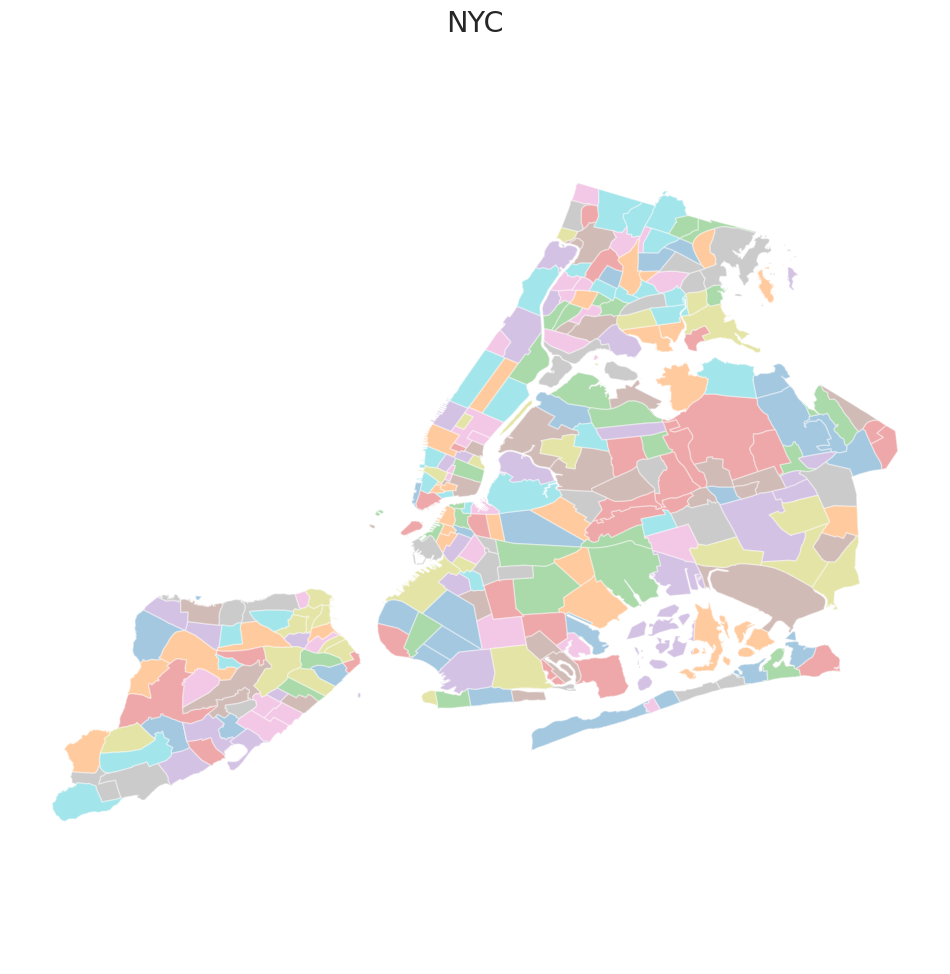

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

hoods = hoods.to_crs({'init': 'epsg:4326'})

ax = hoods.plot(column = "neighborhood", figsize = (12, 12), alpha = 0.4)

ax.axis('off')
ax.set_title("NYC", fontsize='xx-large')
ax.axis('equal')

In [12]:
!pip install folium
!pip install uszipcode
%pip install pygeohash
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=7d8a7bc1545b538ac36cee0c15aca33d4999ee8b06bb0c3ba18cc0fa17d415d7
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.29
    Uninstalling SQLAlchemy-2.0.29:
      Successfully uninstalled SQLAlchemy-2.0.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4

join the geojson and csv

In [14]:
import pygeohash as gh

sampling_fraction = 0.6
geohash_precision = 6

mobility2['pickup_geohash']=mobility2.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=geohash_precision), axis=1)

import geopandas as gpd
gdf_NYCMob = gpd.GeoDataFrame(mobility2,   geometry=gpd.points_from_xy(mobility2.longitude, mobility2.latitude))

gdf_NYCMob = gdf_NYCMob.set_crs('epsg:4326')
gdf_NYCMob.head(2)

,id,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,latitude,longitude,pickup_geohash,geometry
0,0,2016-01-01 00:29:24,2016-01-01 00:39:36,40.680611,-73.928642,-73.924278,40.698044,1,1.46,11.16,40.680611,-73.928642,dr5rmt,POINT (-73.92864 40.68061)
1,1,2016-01-01 00:19:39,2016-01-01 00:39:18,40.723175,-73.952675,-73.923920,40.761379,1,3.56,16.80,40.723175,-73.952675,dr5rtj,POINT (-73.95267 40.72318)


In [15]:
sjoined_NYC_original = gpd.sjoin(gdf_NYCMob, hoods, predicate="within")
sjoined_NYC_original.head(2)

<ipython-input-15-23a3272e15ad>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  sjoined_NYC_original = gpd.sjoin(gdf_NYCMob, hoods, predicate="within")


,id,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,latitude,longitude,pickup_geohash,geometry,index_right,neighborhood,boroughCode,borough,@id
0,0,2016-01-01 00:29:24,2016-01-01 00:39:36,40.680611,-73.928642,-73.924278,40.698044,1,1.46,11.16,40.680611,-73.928642,dr5rmt,POINT (-73.92864 40.68061),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant
20,20,2016-01-01 00:30:54,2016-01-01 00:39:42,40.693459,-73.948799,-73.962814,40.709942,1,1.57,8.80,40.693459,-73.948799,dr5rt2,POINT (-73.94880 40.69346),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant


In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [17]:
df = pd.DataFrame(sjoined_NYC_original)
df

,id,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,latitude,longitude,pickup_geohash,geometry,index_right,neighborhood,boroughCode,borough,@id
0,0,2016-01-01 00:29:24,2016-01-01 00:39:36,40.680611,-73.928642,-73.924278,40.698044,1,1.46,11.16,40.680611,-73.928642,dr5rmt,POINT (-73.92864 40.68061),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant
20,20,2016-01-01 00:30:54,2016-01-01 00:39:42,40.693459,-73.948799,-73.962814,40.709942,1,1.57,8.80,40.693459,-73.948799,dr5rt2,POINT (-73.94880 40.69346),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant
28,28,2016-01-01 00:34:53,2016-01-01 00:39:08,40.692383,-73.943100,-73.957466,40.690716,6,0.61,6.30,40.692383,-73.943100,dr5rmr,POINT (-73.94310 40.69238),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant
43,43,2016-01-01 00:27:21,2016-01-01 00:38:44,40.687168,-73.923553,-73.933022,40.672501,1,1.66,10.30,40.687168,-73.923553,dr5rmy,POINT (-73.92355 40.68717),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant
54,54,2016-01-01 00:26:33,2016-01-01 00:39:28,40.690037,-73.951538,-73.938240,40.708569,1,2.50,12.30,40.690037,-73.951538,dr5rmp,POINT (-73.95154 40.69004),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120943,1120943,2016-01-25 18:01:15,2016-01-25 18:01:18,40.724373,-73.992821,-73.992813,40.724369,1,6.10,29.10,40.724373,-73.992821,dr5rsm,POINT (-73.99282 40.72437),205,NoHo,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/NoHo
1222324,1222324,2016-01-27 23:51:22,2016-01-27 23:51:22,40.720242,-73.989220,0.000000,0.000000,1,0.00,3.50,40.720242,-73.989220,dr5rsk,POINT (-73.98922 40.72024),177,Lower East Side,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Lower_East_Side
1260230,1260230,2016-01-28 20:17:06,2016-01-28 20:23:06,40.548313,-74.140068,-74.140038,40.548393,1,0.00,55.30,40.548313,-74.140068,dr5q8v,POINT (-74.14007 40.54831),122,Great Kills,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Great_Kills
1342622,1342622,2016-01-30 06:02:22,2016-01-30 06:30:35,40.558128,-73.925751,-73.776360,40.645988,2,16.80,50.00,40.558128,-73.925751,dr5qtz,POINT (-73.92575 40.55813),25,Breezy Point,4,Queens,http://nyc.pediacities.com/Resource/Neighborhood/Breezy_Point


In [18]:
import datetime as dt

df['pday'] = df['lpep_pickup_datetime'].astype("datetime64[s]").dt.day
df['phour'] = df['lpep_pickup_datetime'].astype("datetime64[s]").dt.hour
df['pmonth'] = df['lpep_pickup_datetime'].astype("datetime64[s]").dt.month
df['pyear'] = df['lpep_pickup_datetime'].astype("datetime64[s]").dt.year
df

,id,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,...,geometry,index_right,neighborhood,boroughCode,borough,@id,pday,phour,pmonth,pyear
0,0,2016-01-01 00:29:24,2016-01-01 00:39:36,40.680611,-73.928642,-73.924278,40.698044,1,1.46,11.16,...,POINT (-73.92864 40.68061),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
20,20,2016-01-01 00:30:54,2016-01-01 00:39:42,40.693459,-73.948799,-73.962814,40.709942,1,1.57,8.80,...,POINT (-73.94880 40.69346),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
28,28,2016-01-01 00:34:53,2016-01-01 00:39:08,40.692383,-73.943100,-73.957466,40.690716,6,0.61,6.30,...,POINT (-73.94310 40.69238),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
43,43,2016-01-01 00:27:21,2016-01-01 00:38:44,40.687168,-73.923553,-73.933022,40.672501,1,1.66,10.30,...,POINT (-73.92355 40.68717),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
54,54,2016-01-01 00:26:33,2016-01-01 00:39:28,40.690037,-73.951538,-73.938240,40.708569,1,2.50,12.30,...,POINT (-73.95154 40.69004),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120943,1120943,2016-01-25 18:01:15,2016-01-25 18:01:18,40.724373,-73.992821,-73.992813,40.724369,1,6.10,29.10,...,POINT (-73.99282 40.72437),205,NoHo,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/NoHo,25,18,1,2016
1222324,1222324,2016-01-27 23:51:22,2016-01-27 23:51:22,40.720242,-73.989220,0.000000,0.000000,1,0.00,3.50,...,POINT (-73.98922 40.72024),177,Lower East Side,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Lower_East_Side,27,23,1,2016
1260230,1260230,2016-01-28 20:17:06,2016-01-28 20:23:06,40.548313,-74.140068,-74.140038,40.548393,1,0.00,55.30,...,POINT (-74.14007 40.54831),122,Great Kills,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Great_Kills,28,20,1,2016
1342622,1342622,2016-01-30 06:02:22,2016-01-30 06:30:35,40.558128,-73.925751,-73.776360,40.645988,2,16.80,50.00,...,POINT (-73.92575 40.55813),25,Breezy Point,4,Queens,http://nyc.pediacities.com/Resource/Neighborhood/Breezy_Point,30,6,1,2016


In [19]:
%%time
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
# Install Folium for Geographic data visualization
!pip install folium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,371 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubun

In [20]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point

convert to geodataframe

In [21]:
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=df["geometry"])
gdf

,id,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,...,geometry,index_right,neighborhood,boroughCode,borough,@id,pday,phour,pmonth,pyear
0,0,2016-01-01 00:29:24,2016-01-01 00:39:36,40.680611,-73.928642,-73.924278,40.698044,1,1.46,11.16,...,POINT (-73.92864 40.68061),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
20,20,2016-01-01 00:30:54,2016-01-01 00:39:42,40.693459,-73.948799,-73.962814,40.709942,1,1.57,8.80,...,POINT (-73.94880 40.69346),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
28,28,2016-01-01 00:34:53,2016-01-01 00:39:08,40.692383,-73.943100,-73.957466,40.690716,6,0.61,6.30,...,POINT (-73.94310 40.69238),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
43,43,2016-01-01 00:27:21,2016-01-01 00:38:44,40.687168,-73.923553,-73.933022,40.672501,1,1.66,10.30,...,POINT (-73.92355 40.68717),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
54,54,2016-01-01 00:26:33,2016-01-01 00:39:28,40.690037,-73.951538,-73.938240,40.708569,1,2.50,12.30,...,POINT (-73.95154 40.69004),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120943,1120943,2016-01-25 18:01:15,2016-01-25 18:01:18,40.724373,-73.992821,-73.992813,40.724369,1,6.10,29.10,...,POINT (-73.99282 40.72437),205,NoHo,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/NoHo,25,18,1,2016
1222324,1222324,2016-01-27 23:51:22,2016-01-27 23:51:22,40.720242,-73.989220,0.000000,0.000000,1,0.00,3.50,...,POINT (-73.98922 40.72024),177,Lower East Side,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Lower_East_Side,27,23,1,2016
1260230,1260230,2016-01-28 20:17:06,2016-01-28 20:23:06,40.548313,-74.140068,-74.140038,40.548393,1,0.00,55.30,...,POINT (-74.14007 40.54831),122,Great Kills,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Great_Kills,28,20,1,2016
1342622,1342622,2016-01-30 06:02:22,2016-01-30 06:30:35,40.558128,-73.925751,-73.776360,40.645988,2,16.80,50.00,...,POINT (-73.92575 40.55813),25,Breezy Point,4,Queens,http://nyc.pediacities.com/Resource/Neighborhood/Breezy_Point,30,6,1,2016


visualizing how different projections transform data

1)

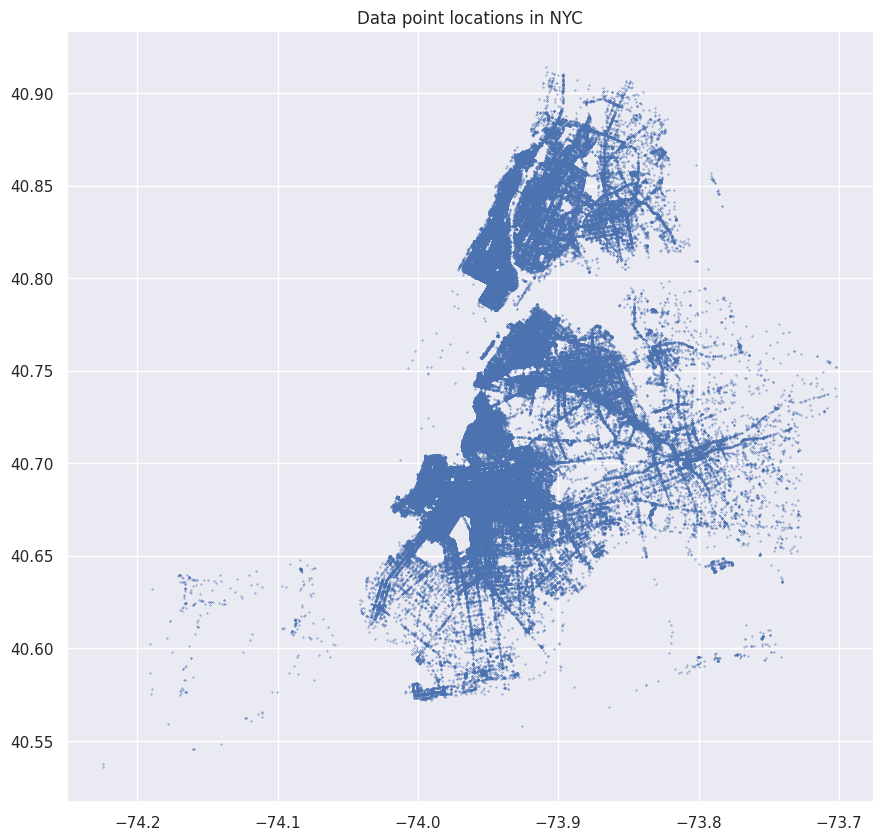

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(markersize=0.1,ax=ax);
ax.set_title('Data point locations in NYC')
plt.show()

2)

In [23]:
nyc_gdf_proj = gdf.to_crs({'init': 'epsg:32618'})
nyc_gdf_proj.tail()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,id,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,...,geometry,index_right,neighborhood,boroughCode,borough,@id,pday,phour,pmonth,pyear
1120943,1120943,2016-01-25 18:01:15,2016-01-25 18:01:18,40.724373,-73.992821,-73.992813,40.724369,1,6.10,29.10,...,POINT (585057.858 4508648.345),205,NoHo,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/NoHo,25,18,1,2016
1222324,1222324,2016-01-27 23:51:22,2016-01-27 23:51:22,40.720242,-73.989220,0.000000,0.000000,1,0.00,3.50,...,POINT (585367.258 4508193.235),177,Lower East Side,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Lower_East_Side,27,23,1,2016
1260230,1260230,2016-01-28 20:17:06,2016-01-28 20:23:06,40.548313,-74.140068,-74.140038,40.548393,1,0.00,55.30,...,POINT (572813.481 4488972.739),122,Great Kills,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Great_Kills,28,20,1,2016
1342622,1342622,2016-01-30 06:02:22,2016-01-30 06:30:35,40.558128,-73.925751,-73.776360,40.645988,2,16.80,50.00,...,POINT (590947.504 4490261.412),25,Breezy Point,4,Queens,http://nyc.pediacities.com/Resource/Neighborhood/Breezy_Point,30,6,1,2016
1418220,1418220,2016-01-31 12:34:09,2016-01-31 13:03:50,40.702007,-74.012718,-73.940582,40.692688,1,7.79,34.56,...,POINT (583405.368 4506146.539),97,Financial District,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Financial_District,31,12,1,2016


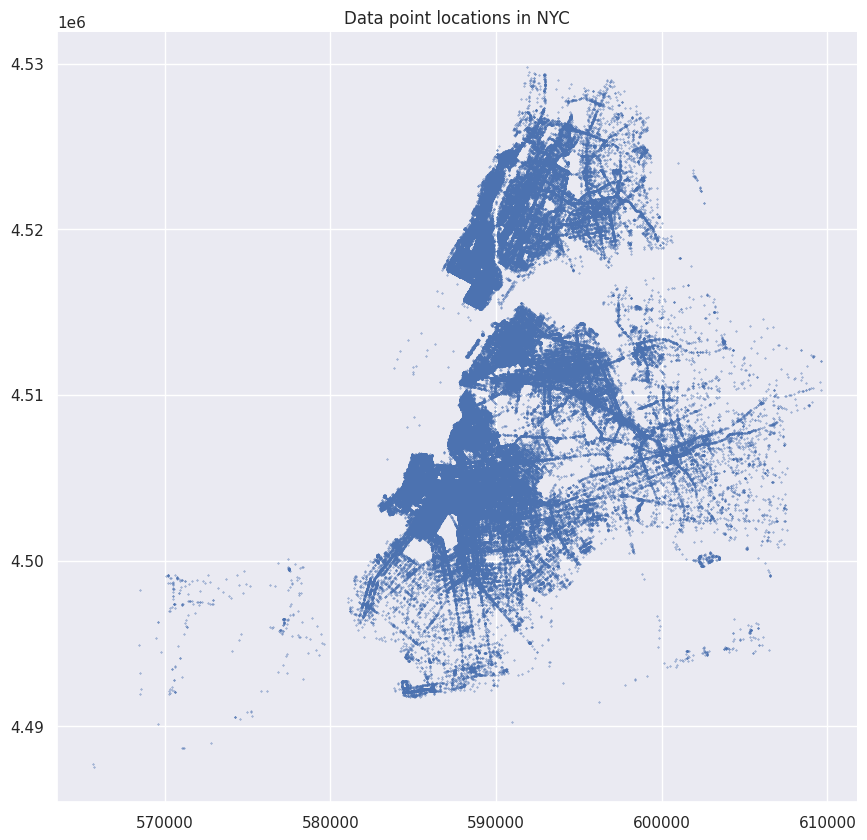

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
nyc_gdf_proj.plot(markersize=0.1,ax=ax);
ax.set_title('Data point locations in NYC')
plt.show()

choose data subset

In [25]:
neighborhoodcp = nyc_gdf_proj[nyc_gdf_proj['neighborhood']== 'Clason Point']
neighborhoodcp

,id,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,...,geometry,index_right,neighborhood,boroughCode,borough,@id,pday,phour,pmonth,pyear
7525,7525,2016-01-01 01:02:37,2016-01-01 01:25:16,40.819176,-73.866287,-73.973396,40.789528,1,7.92,26.30,...,POINT (595608.002 4519302.520),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,1,1,1,2016
8713,8713,2016-01-01 01:31:30,2016-01-01 01:38:56,40.821655,-73.858147,-73.856255,40.836140,1,1.40,8.30,...,POINT (596290.937 4519586.686),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,1,1,1,2016
9881,9881,2016-01-01 01:34:07,2016-01-01 01:50:42,40.817787,-73.862274,-73.902245,40.854473,1,3.92,16.30,...,POINT (595948.438 4519152.764),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,1,1,1,2016
12057,12057,2016-01-01 01:52:52,2016-01-01 02:06:05,40.821987,-73.858276,-73.927567,40.828442,1,6.60,20.80,...,POINT (596279.520 4519623.385),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,1,1,1,2016
16454,16454,2016-01-01 02:38:46,2016-01-01 02:50:00,40.810101,-73.855469,-73.882523,40.856129,1,4.61,16.30,...,POINT (596533.517 4518306.952),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,1,2,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401202,1401202,2016-01-31 02:34:54,2016-01-31 02:37:32,40.819008,-73.857491,-73.860298,40.827606,1,0.52,5.30,...,POINT (596350.100 4519293.522),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,31,2,1,2016
1401204,1401204,2016-01-31 02:18:16,2016-01-31 02:18:19,40.818394,-73.866135,-73.866135,40.818394,1,0.00,10.00,...,POINT (595621.994 4519215.876),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,31,2,1,2016
1401297,1401297,2016-01-31 02:25:27,2016-01-31 02:41:51,40.815041,-73.859444,-73.908623,40.858624,5,5.75,15.00,...,POINT (596191.117 4518850.971),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,31,2,1,2016
1412889,1412889,2016-01-31 09:02:55,2016-01-31 09:17:38,40.820141,-73.859024,-73.865280,40.770588,1,8.86,56.25,...,POINT (596219.136 4519417.606),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,31,9,1,2016


create buffer

In [26]:
point1 = neighborhoodcp[:1]
buf10 = point1.buffer(10)
buf50 = point1.buffer(50)
buf100 = point1.buffer(100)

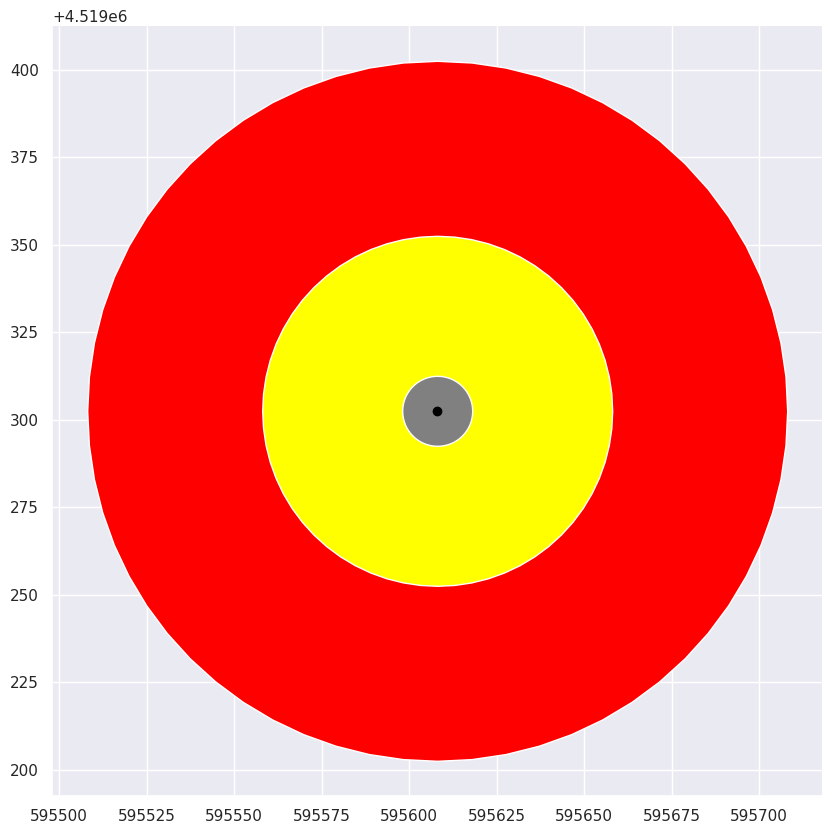

In [27]:
fig, ax = plt.subplots(figsize=(12, 10))
buf100.plot(color = 'red', ax=ax);
buf50.plot(ax=ax, color='yellow')
buf10.plot(ax=ax, color='gray');
point1.plot(ax=ax, color='black')
plt.show()

visualize subset

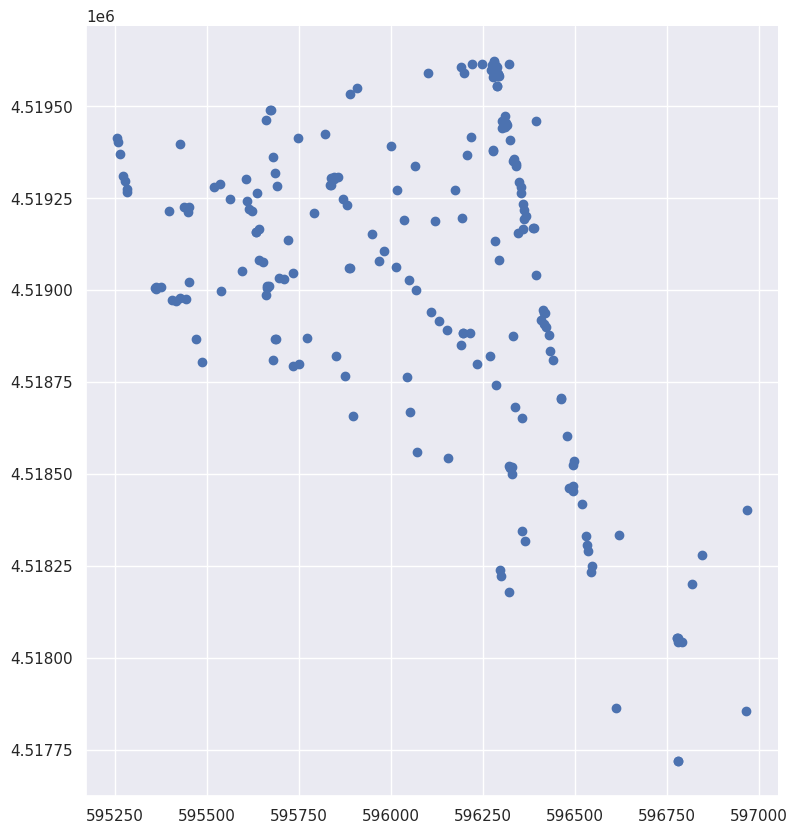

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))
neighborhoodcp.plot(ax=ax)
plt.show()

visualize buffered subset

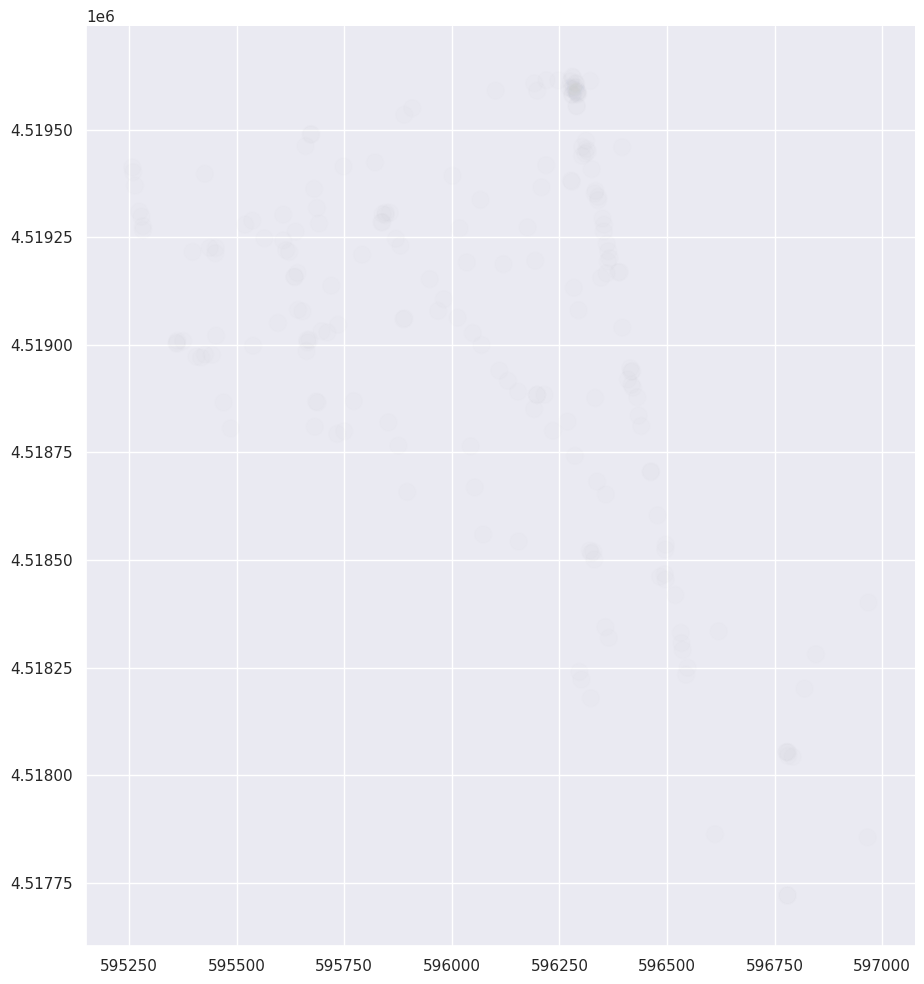

In [29]:
fig, ax = plt.subplots(figsize=(12, 10))
neighborhoodcp.buffer(20).plot(ax=ax, facecolor='grey',edgecolor='lightblue', alpha=0.01)
plt.tight_layout()
plt.show()

remove non numerical columns

In [30]:
df

,id,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,...,geometry,index_right,neighborhood,boroughCode,borough,@id,pday,phour,pmonth,pyear
0,0,2016-01-01 00:29:24,2016-01-01 00:39:36,40.680611,-73.928642,-73.924278,40.698044,1,1.46,11.16,...,POINT (-73.92864 40.68061),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
20,20,2016-01-01 00:30:54,2016-01-01 00:39:42,40.693459,-73.948799,-73.962814,40.709942,1,1.57,8.80,...,POINT (-73.94880 40.69346),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
28,28,2016-01-01 00:34:53,2016-01-01 00:39:08,40.692383,-73.943100,-73.957466,40.690716,6,0.61,6.30,...,POINT (-73.94310 40.69238),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
43,43,2016-01-01 00:27:21,2016-01-01 00:38:44,40.687168,-73.923553,-73.933022,40.672501,1,1.66,10.30,...,POINT (-73.92355 40.68717),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
54,54,2016-01-01 00:26:33,2016-01-01 00:39:28,40.690037,-73.951538,-73.938240,40.708569,1,2.50,12.30,...,POINT (-73.95154 40.69004),16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborhood/Bedford_Stuyvesant,1,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120943,1120943,2016-01-25 18:01:15,2016-01-25 18:01:18,40.724373,-73.992821,-73.992813,40.724369,1,6.10,29.10,...,POINT (-73.99282 40.72437),205,NoHo,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/NoHo,25,18,1,2016
1222324,1222324,2016-01-27 23:51:22,2016-01-27 23:51:22,40.720242,-73.989220,0.000000,0.000000,1,0.00,3.50,...,POINT (-73.98922 40.72024),177,Lower East Side,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Lower_East_Side,27,23,1,2016
1260230,1260230,2016-01-28 20:17:06,2016-01-28 20:23:06,40.548313,-74.140068,-74.140038,40.548393,1,0.00,55.30,...,POINT (-74.14007 40.54831),122,Great Kills,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Great_Kills,28,20,1,2016
1342622,1342622,2016-01-30 06:02:22,2016-01-30 06:30:35,40.558128,-73.925751,-73.776360,40.645988,2,16.80,50.00,...,POINT (-73.92575 40.55813),25,Breezy Point,4,Queens,http://nyc.pediacities.com/Resource/Neighborhood/Breezy_Point,30,6,1,2016


In [31]:
df = df.drop(columns=['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'geometry', 'borough', 'neighborhood', '@id','latitude', 'longitude', 'pickup_geohash'])
df

,id,Pickup_latitude,Pickup_longitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,index_right,boroughCode,pday,phour,pmonth,pyear
0,0,40.680611,-73.928642,-73.924278,40.698044,1,1.46,11.16,16,3,1,0,1,2016
20,20,40.693459,-73.948799,-73.962814,40.709942,1,1.57,8.80,16,3,1,0,1,2016
28,28,40.692383,-73.943100,-73.957466,40.690716,6,0.61,6.30,16,3,1,0,1,2016
43,43,40.687168,-73.923553,-73.933022,40.672501,1,1.66,10.30,16,3,1,0,1,2016
54,54,40.690037,-73.951538,-73.938240,40.708569,1,2.50,12.30,16,3,1,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120943,1120943,40.724373,-73.992821,-73.992813,40.724369,1,6.10,29.10,205,1,25,18,1,2016
1222324,1222324,40.720242,-73.989220,0.000000,0.000000,1,0.00,3.50,177,1,27,23,1,2016
1260230,1260230,40.548313,-74.140068,-74.140038,40.548393,1,0.00,55.30,122,5,28,20,1,2016
1342622,1342622,40.558128,-73.925751,-73.776360,40.645988,2,16.80,50.00,25,4,30,6,1,2016


create train/test split and scale the predictors with the StandardScaler class:

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Trip_distance', axis=1)
y = df['Trip_distance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Using Principal Component Analysis (PCA) to determine feature importance
1) fit PCA to our scaled data
2) plot a line plot of the cumulative explained variance:

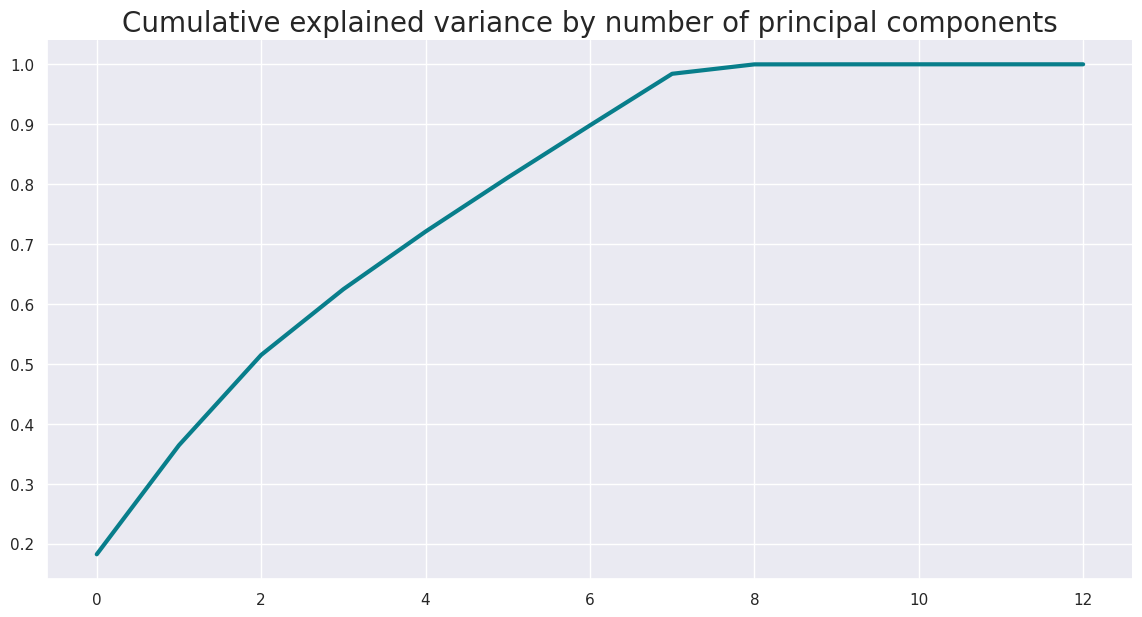

In [33]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

We learn that using 6 principal components, 90% of the dataset's variance could be explained.

computing loading scores:

In [34]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
id,-0.947992,0.311711,0.016773,-0.031234,0.025129,-0.006811,0.008657,-0.041440,-0.001343,0.020480,-0.000098,0.0,0.0
Pickup_latitude,-0.025617,-0.089659,-0.860388,-0.403844,0.064331,0.068626,0.075391,0.075079,-0.260344,-0.000008,0.000505,0.0,0.0
Pickup_longitude,0.031837,-0.000295,0.105151,-0.912781,-0.210881,-0.071806,0.227460,0.151384,0.174581,0.000035,0.000208,0.0,0.0
Dropoff_longitude,0.310612,0.944937,-0.100234,-0.017557,-0.003318,0.006573,-0.000107,0.001345,-0.004366,-0.000148,-0.013565,0.0,0.0
Dropoff_latitude,-0.310785,-0.947691,0.069925,-0.011594,0.001664,-0.005252,0.006353,0.002876,-0.002747,-0.000146,-0.013574,0.0,0.0


PC1 explains around +30% of the variance in the data. With the others explaining less and less. This makes PC1 very the most important. There is only around ~30% +- correlation between PC1 and the pickup location aand dropoff locations.

Correlations between all of the input features and the first principal components:

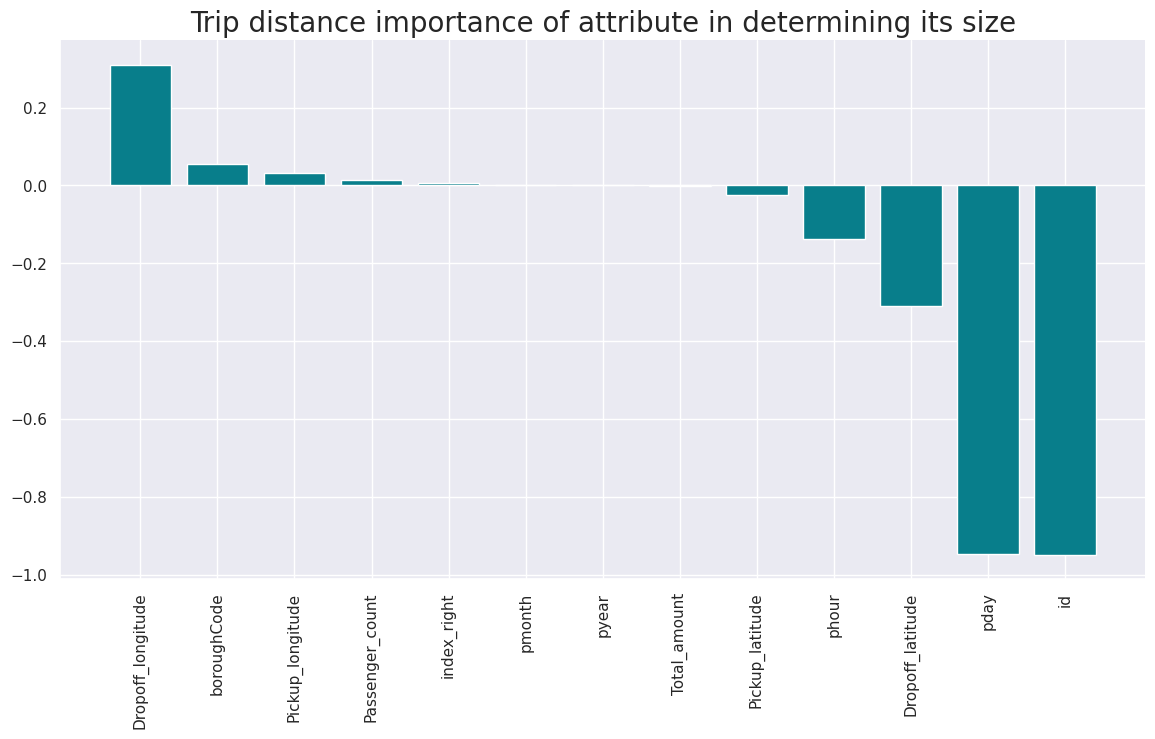

In [35]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('Trip distance importance of attribute in determining its size', size=20)
plt.xticks(rotation='vertical')
plt.show()